# Neural networks in PyTorch
Neural networks tend to have a huge number of layers. This is why they are called "deep".  
It is possible to construct a neural network with the matrix of weights, but it is difficult and cumbersome.  
PyTorch has a very nice package which permits to build large neural networks `nn`.  

**Note:** to download the dataset we used `wget` which cannot be installed properly using the commands `conda` or `pip3`, 
so we downloaded the .exe version by the [wget site](https://eternallybored.org/misc/wget/) and we put it in a folder listed in the `Path` environment variable (we chose the path to miniconda).

In [ ]:
import wget
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

In [10]:
# Import necessary packages
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import torch
# the following was for making function the library matplotlib
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Now, we are going to create a neural network for classify digits in 10 classes which are in the dataset MNIST.   
Each image is 28x28 pixels.  
First, we want to get our dataset which is available thanks to `torchvision` package.  
The following code is able to divide the dataset in training and test set.

In [11]:
import torch
from torchvision import datasets, transforms

# define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('./', download=False, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

We have the training data loaded in `trainloader` and we make that an iterator with `iter(trainloader)`.  

We will use this for looping in the training data, as follows:  
`for image,label in trainloader:  
do something with images and labels`  

We have created `trainloader` with `batch_size=64` and `shuffle=True`.  
The batch size is the number of images we use for training (one iteration on dataloader). And `shuffle=True` tells to shuffle  
the dataset every time we start going through the data loader again.  

In the following chunck of code we take only the first batch, so we can check the data.  
So, we can see that the images are tensors and that one tensor has size of `[64, 1, 28, 28]` which means that,  
as expected, we have a tensor of 64 images of 1 channel and width and height 28

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


This is what one image looks like in the MNIST dataset.

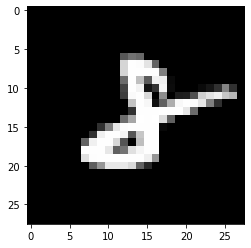

In [13]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')
plt.show()

First, we try to do the neural network using the matrix of weights and multiplications. Then, we will see how to use `nn` module of PyTorch which permits us to do this much faster.  
The networks which we have seen so far are named *dense* or *fully connected*. We have that for such networks each input has to be a vector. However, we can stack the samples in an unique 2D tensor, for example stacking the samples of a batch. We have images of size `[1,64,64]`, thus we want a 1D vector of size `[1,784]`. And because for a training step we give a batch of images, we will give `[64,784]` tensor in input. To make a 2D image a 1D vector is called *flattening*.  
  
Now, we want to create a network with 10 output neurons, one for each digit.  
We flatten the first batch of images.  
Then, we want to create a neural network with one hidden unit with 256 neurons.  
We use a sigmoid activation function for the hidden layer and we leave as it is the output layer.

In [14]:
def activation(x):
    """ Sigmoid activation function

        Arguments
        -----------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))
images_flattened = images.view(64,784)
print(images_flattened.shape)
features = images_flattened

torch.manual_seed(7) # Set the random seed so things are predictable

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 275                  # Number of hidden units 
n_output = 10                   # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

h1 = activation(torch.mm(features,W1)+B1)
out = torch.mm(h1,W2)+B2
print("The output of the neural network has dimension ", output2.shape)

torch.Size([64, 784])


NameError: name 'output2' is not defined

We have 10 outputs from our network. We want to have a probability distribution from our network.  
An untrained network gives an uniform distribution.  
To calculate the distribution many times the SoftMax function is used:
$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$
This function is used because it returns for each real number a number between 0 and 1 (so similarly to a probability distribution).  
Moreover, we want to give also the property that all the realizations of a certain event sum up to 1, so it is also normalized over all the possible realizations.

In [15]:
def softmax(x):
    den = torch.sum(torch.exp(x), dim=1)
    den = den.view(64,1)
    return torch.exp(x)/den

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# Building networks with PyTorch
Now, we will see how to create such a neural netork with the module `nn` of PyTorch.

In [16]:
from torch import nn

In [17]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

We are inheriting from `nn.Module`. Combined with `super.__init__()` traks the architecture and give a lot of useful methods and attributes.  
We have always to create a class which inherits from the `nn.Module` when we create a class for our network module.  
The `__init__()` method has to have defined all the necessary functions.
Classes which inherit from `nn.Module` have to implement the `forward(self,x)` method.

In [18]:
# Create the network and look at its text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

We can define the networks more concisely if we use the module `torch.nn.functional`.  
It is really straighforward, indeed they are simple element-wise functions.

In [19]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

## Activation functions
The activation functions have to be non-linear. Generally, the ReLU is used for the hidden layers.

In [20]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### Initializing weights and biases
The weights are automatically initialized, but it is possible to customize them. Indeed, we can get them with `model.fc1.weights`.

In [21]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-5.1988e-04, -2.6170e-02, -2.7710e-02,  ...,  2.5481e-02,
          2.3572e-02,  2.2991e-02],
        [-2.3992e-02, -1.6561e-02,  2.4490e-05,  ...,  6.3356e-03,
         -2.7183e-02,  3.4854e-02],
        [ 3.3389e-02, -1.1781e-02, -1.2778e-02,  ..., -2.7767e-02,
         -1.7271e-02,  2.3401e-02],
        ...,
        [-2.8881e-02,  1.4456e-02, -1.2527e-03,  ...,  3.0431e-02,
          2.0927e-02,  1.1396e-03],
        [ 2.0099e-02, -1.3141e-02,  1.7603e-02,  ..., -3.2605e-02,
          5.3328e-03, -2.4799e-02],
        [ 2.4760e-02,  4.7972e-03,  3.3031e-02,  ...,  1.6544e-02,
         -2.5652e-02, -1.9164e-02]], requires_grad=True)
Parameter containing:
tensor([-0.0122,  0.0150, -0.0192,  0.0215, -0.0191,  0.0217,  0.0213,  0.0056,
        -0.0195,  0.0103,  0.0213, -0.0124,  0.0129,  0.0355, -0.0218,  0.0020,
         0.0326, -0.0352,  0.0036, -0.0197, -0.0290,  0.0162,  0.0050,  0.0334,
         0.0171, -0.0133, -0.0125,  0.0025,  0.0352,  0.0252,  0

For custom initialization, we want to modify such tensors in place. These are `autograd` variables, so we need to get back to original tensors with `model.fc1.weight.data`. So, having the tensors, we can fill them with zeros (for biases) or random normal values.  
[Autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#:~:text=Neural%20networks%20(NNs)%20are%20a,PyTorch%20are%20stored%20in%20tensors.) engine of PyTorch is the catacity of automatic differentiation of variables that powers neural networks training.

In [22]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0165, -0.0050,  0.0218,  ...,  0.0015, -0.0153, -0.0081],
        [ 0.0064,  0.0078,  0.0115,  ..., -0.0018,  0.0014, -0.0083],
        [-0.0146, -0.0066,  0.0050,  ..., -0.0018, -0.0089, -0.0048],
        ...,
        [ 0.0030,  0.0055, -0.0055,  ...,  0.0096, -0.0104,  0.0103],
        [-0.0131, -0.0005, -0.0009,  ...,  0.0180,  0.0238,  0.0040],
        [ 0.0033, -0.0100, -0.0233,  ...,  0.0096, -0.0012,  0.0026]])

## Forward pass
Now, that we have a network let's see what happend when we pass an image.

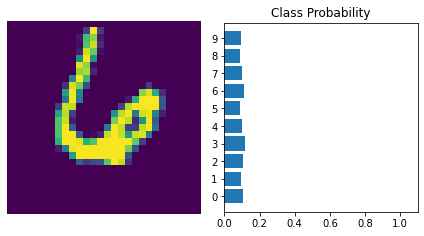

In [24]:
import helper
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

We can see that our network has no idea of what digit is it, indeed we have not trained it yet: all the weights are random!  
Using [`nn.Sequential`](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential)  
PyTorch permits to use simple tools which are useful to build neural networks where a tensor is passed sequentially through the network.

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


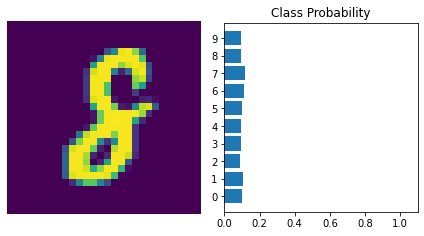

In [25]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)# one batch is made of 64 images and the images are flattened
# we are forwarding the first image of the batch
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

If you want to look at the operations made by the model, you can access thanks to the indices. Indeed, if you want to see the first operation, you have to access the object at the index 0.

In [29]:
print(model[0])
print(model[1])
print(model[0].weight)

Linear(in_features=784, out_features=128, bias=True)
ReLU()
Parameter containing:
tensor([[-0.0084, -0.0071, -0.0188,  ...,  0.0306,  0.0022,  0.0205],
        [ 0.0191,  0.0008, -0.0285,  ...,  0.0110,  0.0150,  0.0206],
        [ 0.0314, -0.0222, -0.0206,  ..., -0.0143, -0.0327,  0.0205],
        ...,
        [ 0.0189, -0.0242, -0.0204,  ...,  0.0274, -0.0326, -0.0158],
        [-0.0149, -0.0234, -0.0058,  ..., -0.0004, -0.0162, -0.0347],
        [ 0.0238,  0.0236,  0.0145,  ..., -0.0206,  0.0287, -0.0347]],
       requires_grad=True)


You might also pass `OrderedDict` and name each layer and operations, instead of accessing them through indices.

In [30]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [38]:
model.fc1
model.fc1.weight

Parameter containing:
tensor([[ 0.0288,  0.0221, -0.0152,  ...,  0.0246,  0.0107, -0.0139],
        [-0.0079,  0.0324, -0.0132,  ..., -0.0035,  0.0041, -0.0283],
        [ 0.0208,  0.0056, -0.0050,  ..., -0.0137,  0.0018,  0.0087],
        ...,
        [ 0.0061,  0.0208,  0.0102,  ..., -0.0171, -0.0221,  0.0046],
        [ 0.0130,  0.0273, -0.0101,  ..., -0.0286, -0.0203,  0.0231],
        [ 0.0154, -0.0275,  0.0019,  ..., -0.0035, -0.0130,  0.0082]],
       requires_grad=True)